In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import  torch

# Tensors
As the name suggests,PyTorch is a library for processing Tensors.A tensor is a multidimensional array,number,vector or a matrix.

Just like NumPy arrays, tensors have a
type and a shape. In fact, in the Python API tensors are simply represented by NumPy
ndarrays. They typically contain floats, but you can also use them to carry strings
(arbitrary byte arrays).

Tensors can have any number of dimensions aand different lengths along each dimension.We can inspect the length along each dimension using the .shape property of tensor.

NOTE that it's not possible to create tensors with an improper shape

In [3]:
t1=torch.tensor(4.)
t1

tensor(4.)

4. is a shorthand for 4.0. used to indicate pytorch that you want to create a floating point number

In [4]:
#vector
t2=torch.tensor([1.,2,3,4])
t2

tensor([1., 2., 3., 4.])

all the elemnts of a tensor have same type

In [5]:
#matrix

t3=torch.tensor([[5.,6],[3,4],[88,9]])
t3

tensor([[ 5.,  6.],
        [ 3.,  4.],
        [88.,  9.]])

In [6]:
#3-d array....gonna give you a cuboid kinda structure
t4=torch.tensor([[[34,55,66],[33,45,6]],[[33,9,8],[22,11,82]]])
t4

tensor([[[34, 55, 66],
         [33, 45,  6]],

        [[33,  9,  8],
         [22, 11, 82]]])

# Tensor operations and gradients

In [7]:
#creating tensors
x=torch.tensor(3.)
w=torch.tensor(4.,requires_grad=True)
b=torch.tensor(5.,requires_grad=True)
x,w,b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

In [8]:
#arithmetic operation
y=w*x+b
y

tensor(17., grad_fn=<AddBackward0>)

Pytorch is unique as we can automatically compute the derivaitve of y w.r.t the tensor that have requires_grad set to true. This feature is called automatic gradient

In [9]:
#computing derivatives
y.backward()

In [10]:
#display gradients
print('dy/dx:',x.grad)
print('dy/dw:',w.grad)
print('dy/db:',b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


# Tensor functions

In [11]:
#create a tensor with a fixed value for every element
t6=torch.full((3,2),33)
t6

tensor([[33, 33],
        [33, 33],
        [33, 33]])

In [12]:
#concatenate two tensors with compatible shapes
t7=torch.cat((t3,t6))
t7

tensor([[ 5.,  6.],
        [ 3.,  4.],
        [88.,  9.],
        [33., 33.],
        [33., 33.],
        [33., 33.]])

In [13]:
#compute the sin of each element
t8=torch.sin(t7)
t8

tensor([[-0.9589, -0.2794],
        [ 0.1411, -0.7568],
        [ 0.0354,  0.4121],
        [ 0.9999,  0.9999],
        [ 0.9999,  0.9999],
        [ 0.9999,  0.9999]])

In [14]:
#change the tensor shape
t9=t8.reshape(3,2,2)
t9

tensor([[[-0.9589, -0.2794],
         [ 0.1411, -0.7568]],

        [[ 0.0354,  0.4121],
         [ 0.9999,  0.9999]],

        [[ 0.9999,  0.9999],
         [ 0.9999,  0.9999]]])

In [15]:
x=np.array([[1,2],[2,5],[5.,6]])
x

array([[1., 2.],
       [2., 5.],
       [5., 6.]])

In [16]:
#convert the numpy array to a PyTorch tensor 
y=torch.from_numpy(x)
y

tensor([[1., 2.],
        [2., 5.],
        [5., 6.]], dtype=torch.float64)

In [17]:
#convert a torch to a numpy array 
z=y.numpy()
z


array([[1., 2.],
       [2., 5.],
       [5., 6.]])

Reasons why we need PyTorch since Numpy alread provides data structures and utillites for working with mutli dimensional numeric data
1. Autograd-the ability to automatically compute gradients for tensor operations is essential for training deep learning models
1. GPU support-while working with massive datasets amd large models,pytorch tensor operations can be performed efficiently using a Graphic Processing Unit.computations that might take hours can be completed within minutes using GPUs

# WORKING WITH MNIST HANDWRITTEN DATABASE

In [18]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [19]:
#downloading training dataset
dataset=MNIST(root='data/',download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 44691274.03it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1584073.62it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 11751806.97it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2153818.97it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [20]:
len(dataset)

60000

In [21]:
test_dataset=MNIST(root='data/',train=False)
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 
#without this the jupyter will show the graphs as a popups#

label: 5


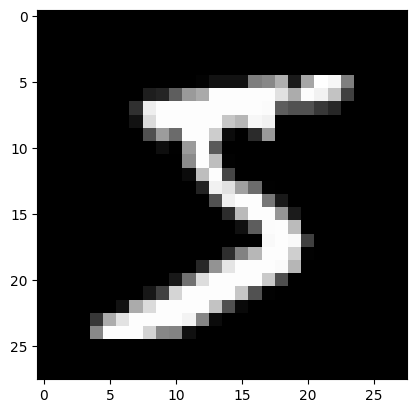

In [23]:
image,label= dataset[0]
plt.imshow(image,cmap='gray')
print('label:',label)

it's evident that it can be challenging to recognize the images with human eye.
PyTorch doesn't know how to work with images.We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset
we can see it is 28x28 pixels image

In [24]:
import torchvision.transforms as transforms

In [25]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [26]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


let's look at the sample values inside the tensor

In [27]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The values range fromm 0 to 1 with 0 representing black,1 white and the values in between are different shades of grey. We can plot the tensor as an image using plt.imshow

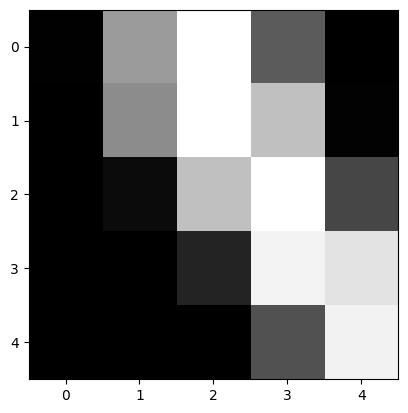

In [28]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

**SPLITTING DATA INTO TRAIN VALIDATION AND TEST SET**

In [29]:
from torch.utils.data import random_split
train_ds, val_ds=random_split(dataset,[50000,10000])

its essential to choose a random sample for creating a validation set. the training data id often sorted by the target labels,i.e images of 0s followed by images of 1s. if we create a val set of the remaninng 20% of images, it would only consists of 8s and 9s. such a split would not make useful models
we'll use a batch size of 128

In [30]:
from torch.utils.data import DataLoader
batch_size=128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

**Training model**
A logistic reegression model is almost identical to a linear regression model. ot contains weights and bias matrices and the output is obtained by simple matrix operations(pred=x@w.t()+b).... @ is matrix mul

we will use nn.linear to create the model instead of manually creating and initializing matrices 

each 1x28x28 image tensor is flattend innto a vector of 784(28*28)

In [31]:
import torch.nn as nn
input_size=28*28
num_classes=10
model=nn.Linear(input_size,num_classes)

let's extend thenn.module class from PyTorch to define a custom model

In [32]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()
        
    

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28\*28 (i.e., 784). One argument to `.reshape` can be set to `-1` (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [33]:
for images,labels in train_loader:
    outputs=model(images)
    break

In [34]:
print(outputs.shape)
print(outputs[:2].data)

torch.Size([128, 10])
tensor([[ 0.1611,  0.0698,  0.1355, -0.0824, -0.1172,  0.2507,  0.3097,  0.1225,
         -0.0643,  0.0319],
        [ 0.0924, -0.1470,  0.1456,  0.2675,  0.3420, -0.0411, -0.0029, -0.3273,
          0.0364,  0.1878]])


for each of the 100 images input,we get 10 outputs. each row's elements must lie between 0 to 1 and adds up to 1 which is not the case. so we use softmax function

In [35]:
import torch.nn.functional  as F

In [36]:
#Apply softmax
probs=F.softmax(outputs,dim=1)
print('sample prob',probs[:2].data)
print(torch.sum(probs[0]).item())

sample prob tensor([[0.1073, 0.0979, 0.1046, 0.0841, 0.0812, 0.1173, 0.1245, 0.1032, 0.0856,
         0.0943],
        [0.1020, 0.0803, 0.1076, 0.1215, 0.1309, 0.0893, 0.0927, 0.0670, 0.0964,
         0.1122]])
0.9999999403953552


In [37]:
# Imports
import torch

import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import random_split
from torch.utils.data import DataLoader
# Hyperparmeters
batch_size = 128
learning_rate = 0.001

# Other constants
input_size = 28*28
num_classes = 10

Label: 3


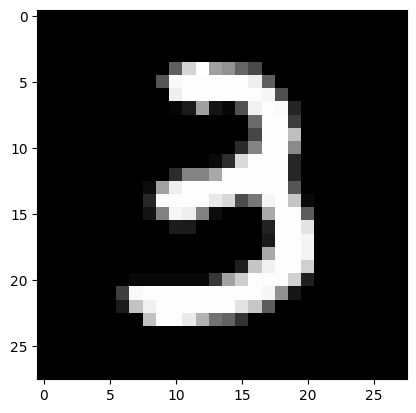

In [38]:
# Download dataset
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)

# Training validation & test dataset
train_ds, val_ds = random_split(dataset, [50000, 10000])
test_ds = MNIST(root='data/', train=False, transform=transforms.ToTensor())

# Dataloaders
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)
test_loader = DataLoader(test_ds, batch_size*2)
image, label = train_ds[0]
plt.imshow(image[0], cmap='gray')
print('Label:', label)

In [39]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()



##Training
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [40]:
evaluate(model, val_loader)

{'val_loss': 2.348517894744873, 'val_acc': 0.10830078274011612}

In [41]:
history = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9672, val_acc: 0.6124
Epoch [1], val_loss: 1.6890, val_acc: 0.7351
Epoch [2], val_loss: 1.4824, val_acc: 0.7700
Epoch [3], val_loss: 1.3272, val_acc: 0.7903
Epoch [4], val_loss: 1.2084, val_acc: 0.8026


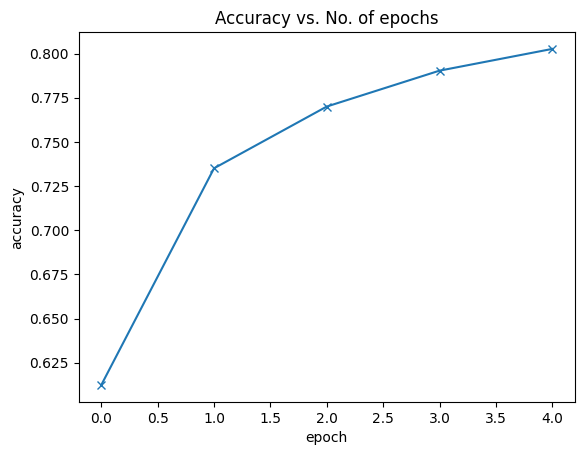

In [42]:
accuracies = [r['val_acc'] for r in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

Label: 2 , Predicted: 1


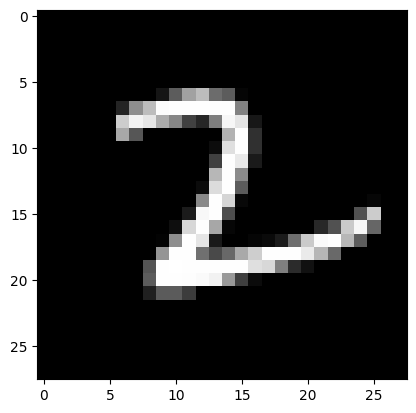

In [43]:
#Prediction
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()
img, label = test_ds[919]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

# tensorflow

In [44]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/opt/conda/lib/python3.10/site-packages/tensorflow/_api/v2/version/__init__.py'>


In [45]:
scalar=tf.constant([[69,5],[6,7],[33,4]])
scalar.ndim
print(scalar)

tf.Tensor(
[[69  5]
 [ 6  7]
 [33  4]], shape=(3, 2), dtype=int32)


In [46]:
scalar

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[69,  5],
       [ 6,  7],
       [33,  4]], dtype=int32)>

In [47]:
scalarr=tf.variable_creator_scope(3)

In [48]:

#creating random tensor
random =tf.random.Generator.from_seed(33)
#set seed for reproducibiltiy
random.normal(shape=(33,2))
#normal outputs random values from a normal distribution


<tf.Tensor: shape=(33, 2), dtype=float32, numpy=
array([[-0.1589871 ,  1.302304  ],
       [ 0.9592239 ,  0.85874265],
       [-1.5181769 ,  1.4020647 ],
       [ 1.5570306 , -0.96762174],
       [ 0.495291  , -0.648484  ],
       [-1.8700892 ,  2.7830641 ],
       [-0.645002  ,  0.18022095],
       [-0.14656258,  0.34374258],
       [ 0.41367555,  0.17573498],
       [-1.0871261 ,  0.45905176],
       [ 0.20386009,  0.562024  ],
       [-2.3001142 , -1.349454  ],
       [ 0.81485   ,  1.2790666 ],
       [ 0.02203509,  1.5428121 ],
       [ 0.78953624,  0.53897345],
       [-0.48535708,  0.74055266],
       [ 0.31662667, -1.4391748 ],
       [ 0.58923835, -1.4268045 ],
       [-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ],
       [ 0.09988727, -0.50998646],
       [-0.7535805 , -0.57166284],
       [ 0.1480774 , -0.23362993],
       [-0.3522796 ,  0.40621263],
       [-1.0523509 ,  1.2054597 ],
       [ 1.6874489 , -0.4462975 ],
      

attributes of tensors

datatype of every element

number of dimensions

shape of tensor

elements along the 0 axis

elements along the last axis

total number of elements in our tensor


Indexing tensors

In [49]:
somelist=[1,23,45,6]
somelist[0:]

[1, 23, 45, 6]

In [50]:
#getting the first two elements of each 

In [51]:

m=tf.constant([[45.,4],[5,6]])


In [52]:
tf.math.reduce_variance(m)
tf.math.reduce_max(m)

<tf.Tensor: shape=(), dtype=float32, numpy=45.0>

In [53]:
tf.argmin(m)

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 0])>

In [54]:
tf.one_hot(somelist,depth=2)

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

# Architecture of a neural network regression model
* input layer shape-same shape as the no. of features
* hidden layer-problem specific
* neurons per hidden layer-problem specific
* output layer shape- same shape as desired predicition shape
* hidden activation-usually reLu(rectified linear unit)
* output activation-
* loss function-MAE,MSE
* optimizer-SGD,Adam

In [55]:
tf.constant(3)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

# regression with neural networks in tensorflow

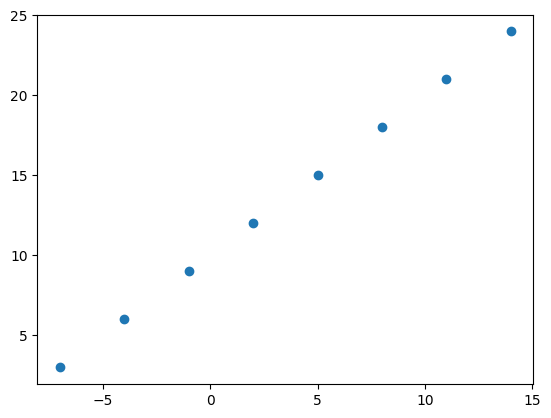

In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0],dtype=tf.float32)

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0],dtype=tf.float32)

# Visualize it
plt.scatter(X, y);

In [57]:
#set random seed
tf.random.set_seed(42)

#create a model using the sequential API
model= tf.keras.Sequential([tf.keras.layers.Dense(1)])
#compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])
#fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000,verbose=0)

In [58]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [59]:
y1=tf.constant([12,4,0,2,9])

In [60]:
model.predict([y1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[22.052658],
       [12.340932],
       [ 7.485069],
       [ 9.913   ],
       [18.41076 ]], dtype=float32)

improving the model
* increase the number of hidden units(all called neurons) within each of the hidden layers,change the activation function of each layer
* changing the optimization function or perhaphs the learning rate of the optimization function.
* fit the model for more epochs or on more data

In [61]:
X1=np.arange(-1000,1000,4)
y1=np.arange(-990,1010,4)

In [62]:
yy=X1+10==y1

splitting data in training set, validation set and  test set
here we only split in train and test set

In [63]:
xtrain=X1[:400]
ytrain=y1[:400]

xtest=X1[400:]
ytest=y1[400:]


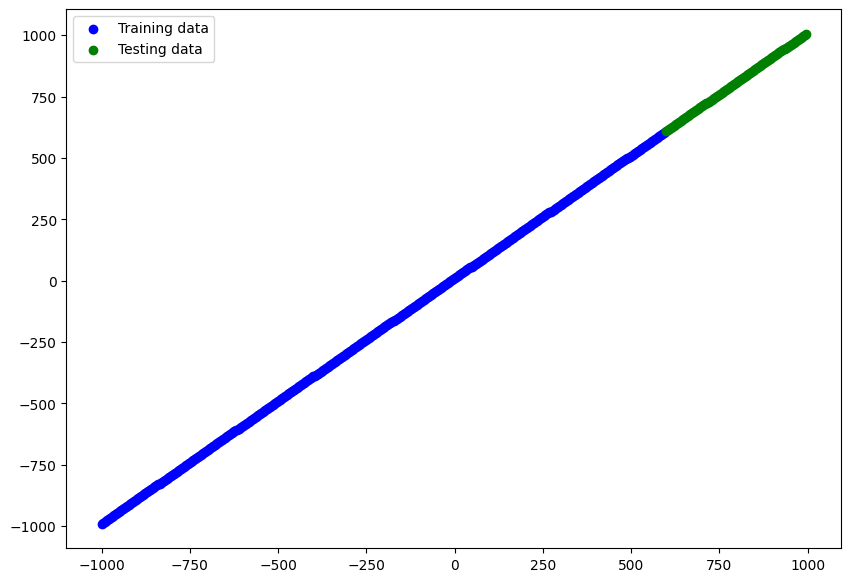

In [64]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(xtrain, ytrain, c='b', label='Training data')
# Plot test data in green
plt.scatter(xtest, ytest, c='g', label='Testing data')
# Show the legend
plt.legend();

In [65]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(xtrain, axis=-1), ytrain, epochs=100, verbose=0) # set verbose to 0 for less output
     


In [66]:
y_preds=model.predict(xtest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [67]:
def plot_predictions(train_data=xtrain, 
                     train_labels=ytrain, 
                     test_data=xtest, 
                     test_labels=ytest, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();
     

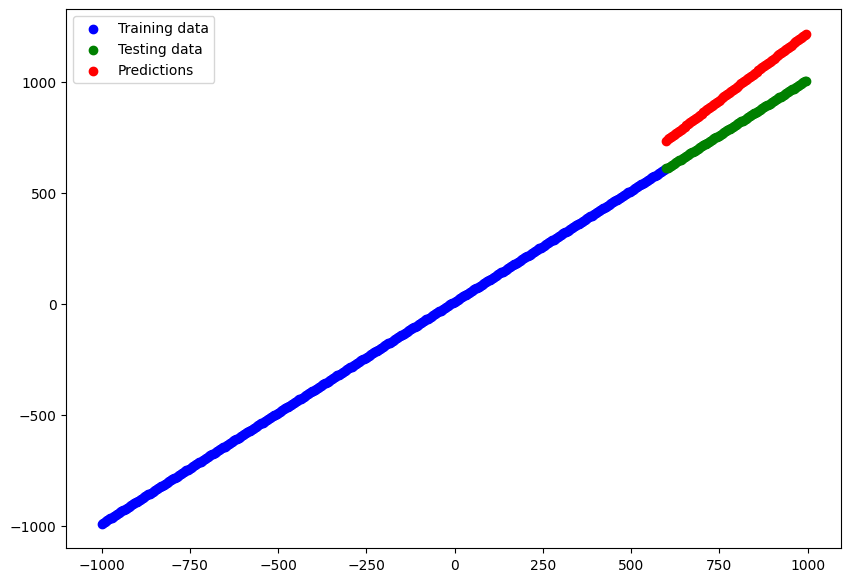

In [68]:
 plot_predictions(train_data=xtrain, 
                     train_labels=ytrain, 
                     test_data=xtest, 
                     test_labels=ytest, 
                     predictions=y_preds)
  

Evaluating model'
the cycle of building a model, fitting of model,evaluate the model, tweak the model and again fit it

In [69]:
model.evaluate(xtest,ytest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 158.9864 - mae: 158.9864  


[168.22975158691406, 168.22975158691406]

In [70]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Classification with neural networks 
Typical architecture of a classification neural network
The word typical is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:

An input layer.
Some hidden layers.
An output layer.


In [71]:
from sklearn.datasets import make_circles
#make 1000eg
n_samples=1000
#create circles
x,y=make_circles(n_samples,noise=0.03,random_state=42)

In [72]:
import pandas as pd
df=pd.DataFrame({'X0':x[:,0],'X1':x[:,1],'label':y})
df

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


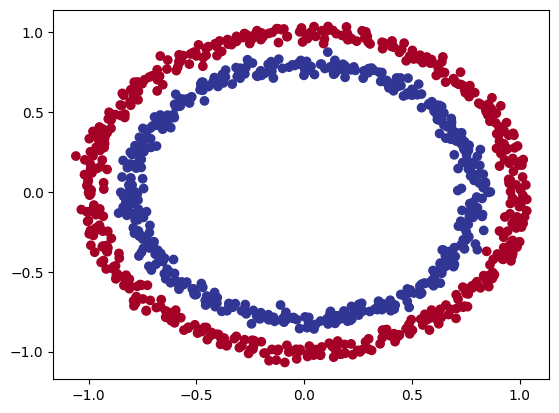

In [73]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

**Steps in modelling**

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).

Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [74]:
import tensorflow as tf
tf.random.set_seed(42)

model_1= tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu')
    ,tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(x, y, epochs=300,verbose=0)
      

In [75]:
model_1.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0145  


[0.01426782924681902, 1.0]

In [76]:
preds=model_1.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [77]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_2.fit(x, y, epochs=100, verbose=0)
     

In [78]:
y3=model_2.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [79]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
     

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


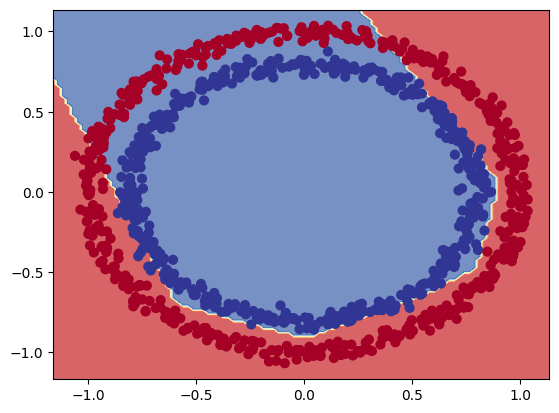

In [80]:
plot_decision_boundary(model_2,x,y)

# Activation functions

In [81]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A
    

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

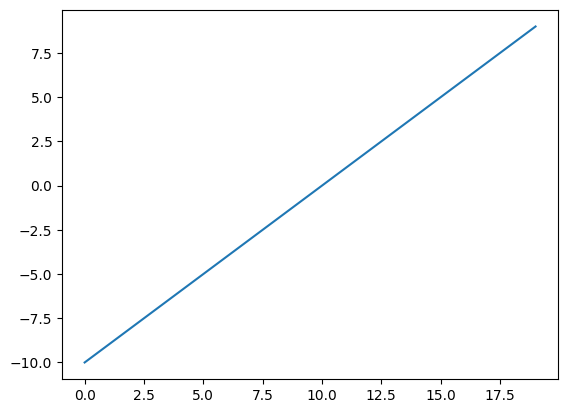

In [82]:
# Visualize our toy tensor
plt.plot(A);

now let's recreate the sigmoid function and see what it does to our data
we can also use the pre defined sigmoid function at tf.keras.actiavtions.sigmoid

Sigmoid takes a real value as input and outputs another value between 0 and 1. It’s easy to work with and has all the nice properties of activation functions: it’s non-linear, continuously differentiable, monotonic, and has a fixed output range.

Pros

It is nonlinear in nature. Combinations of this function are also nonlinear!
It will give an analog activation unlike step function.
It has a smooth gradient too.
It’s good for a classifier.
The output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function. So we have our activations bound in a range. Nice, it won’t blow up the activations then.
Cons

Towards either end of the sigmoid function, the Y values tend to respond very less to changes in X.
It gives rise to a problem of “vanishing gradients”.
Its output isn’t zero centered. It makes the gradient updates go too far in different directions. 0 < output < 1, and it makes optimization harder.
Sigmoids saturate and kill gradients.
The network refuses to learn further or is drastically slow ( depending on use case and until gradient /computation gets hit by floating point value limits ).

In [83]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

lets plot it

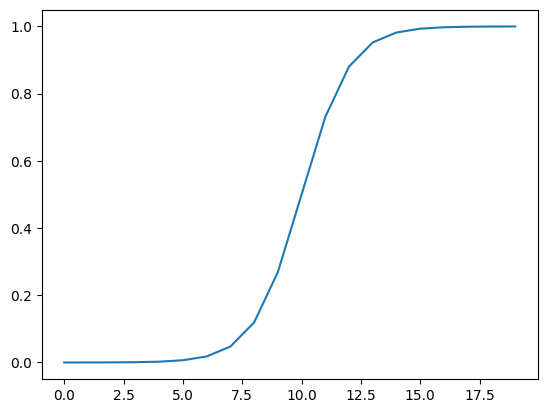

In [84]:
plt.plot(sigmoid(A))

a non linear line!

lets check relu function(turns all negatives to zero and positive numbers stay the same)

A recent invention which stands for Rectified Linear Units. The formula is deceptively simple: max(0,z)
. Despite its name and appearance, it’s not linear and provides the same benefits as Sigmoid (i.e. the ability to learn nonlinear functions), but with better performance.

In [85]:
def relu(x):
    return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

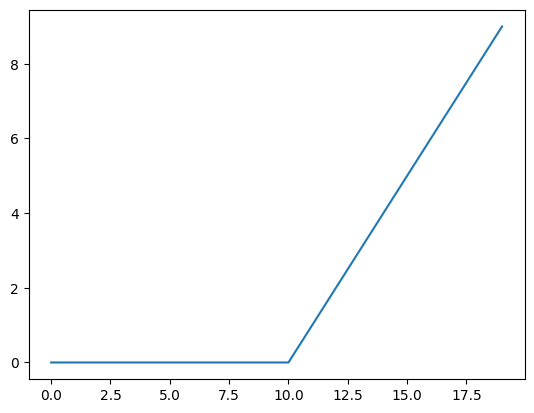

In [86]:
plt.plot(relu(A))

what about linear activation function

In [87]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [88]:
A==tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Tanh squashes a real-valued number to the range [-1, 1]. It’s non-linear. But unlike Sigmoid, its output is zero-centered. Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity.

In [89]:
def tanh(x):
    return(tf.exp(x)-tf.exp(-x)/((tf.exp(x)+tf.exp(-x))))

tanh(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-9.9995458e-01, -9.9987662e-01, -9.9966449e-01, -9.9908733e-01,
       -9.9751508e-01, -9.9321663e-01, -9.8134905e-01, -9.4774032e-01,
       -8.4667850e-01, -5.1291764e-01,  5.0000000e-01,  2.5990789e+00,
        7.3710699e+00,  2.0083065e+01,  5.4597813e+01,  1.4841312e+02,
        4.0342880e+02,  1.0966332e+03,  2.9809580e+03,  8.1030840e+03],
      dtype=float32)>

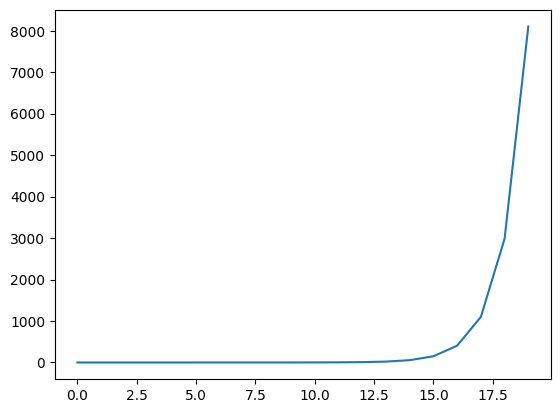

In [90]:
plt.plot(tanh(A))

Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

# Multiclass classification with neural network

In [91]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [92]:
train_data[1]


array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

Okay, 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

But these are just numbers, let's visualize.

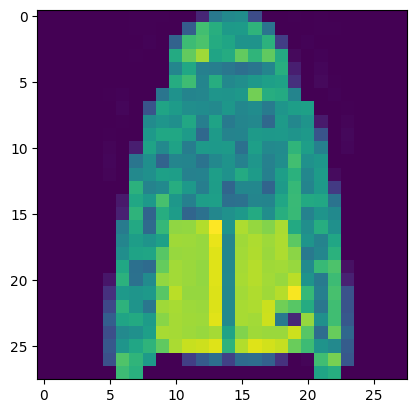

In [93]:
plt.imshow(train_data[22])

In [94]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

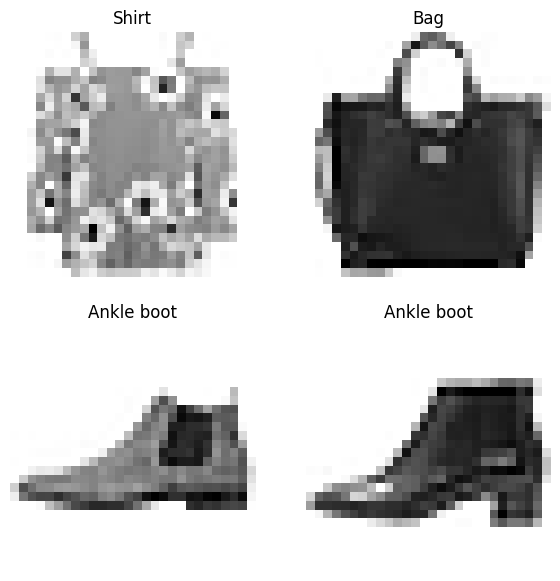

In [95]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)
     

The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).
The output shape will have to be 10 because we need our model to predict for 10 different classes.

We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.



We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, since our labels are in integer form, 

we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().


We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [96]:
import tensorflow as tf
#set random seed
tf.random.set_seed(42)
#build the model
model_m=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
#had to reshape 28x28 to 784, and output shape is 10, activation is softmax
#compile the model
model_m.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
non_norm_history=model_m.fit(train_data,train_labels,epochs=50,validation_data=(test_data,test_labels),verbose=0)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [97]:
#check the shapes of our model 
model_m.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [98]:
train_data.min()

0

right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the non_norm_history variable when calling fit()). It's pixel values are between 0 and 255.

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (known as scaling or normalization).

In [99]:
train_data=train_data/train_data.max()
test_data=test_data/test_data.max()
train_data.max(),test_data.max()

(1.0, 1.0)

yummers!!! now our data is between 0 and 1. let's use the above model with the normalized data

In [112]:
import tensorflow as tf
#set random seed
tf.random.set_seed(42)
#build the model
model_m2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
#had to reshape 28x28 to 784, and output shape is 10, activation is softmax
#compile the model
model_m2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
norm_history=model_m2.fit(train_data,train_labels,epochs=50,validation_data=(test_data,test_labels),verbose=0)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
model_m2.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.4921319e-10, 1.5842973e-11, 9.0374812e-11, ..., 8.7580547e-02,
        2.1055303e-04, 6.5428209e-01],
       [3.1324220e-04, 7.3552858e-10, 9.5221764e-01, ..., 0.0000000e+00,
        1.8995202e-08, 0.0000000e+00],
       [1.7314964e-08, 9.9937624e-01, 5.2336954e-06, ..., 7.2791934e-10,
        3.2854483e-10, 8.6599399e-16],
       ...,
       [8.4562518e-02, 1.8185073e-08, 1.6553808e-03, ..., 8.5857320e-12,
        7.1041495e-01, 1.7087075e-08],
       [1.6154842e-06, 9.9466479e-01, 8.0743528e-05, ..., 2.3580482e-08,
        1.9432733e-08, 1.0691437e-13],
       [1.0250295e-05, 1.3961933e-08, 9.2263735e-07, ..., 1.3602286e-03,
        1.8961269e-02, 9.9241091e-03]], dtype=float32)

<Axes: title={'center': 'Normalized data'}>

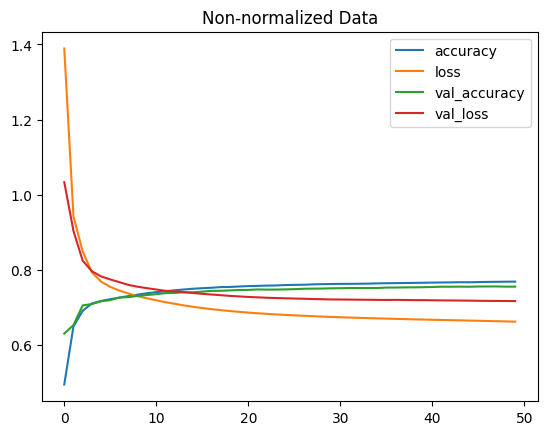

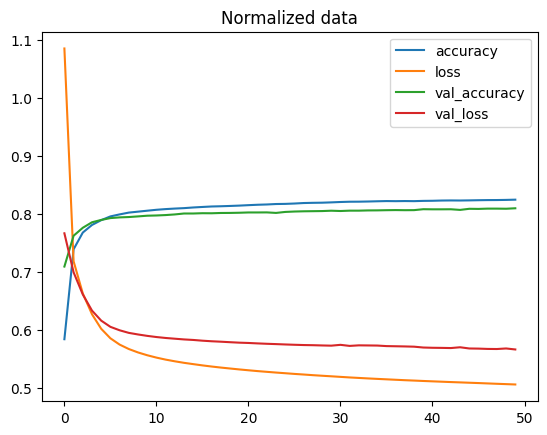

In [115]:
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized Data')
pd.DataFrame(norm_history.history).plot(title='Normalized data')

let's find the ideal  learning rate 

In [120]:
tf.random.set_seed(42)
model_m3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_m3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
find_lr_history = model_m3.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler],verbose=1)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4943 - loss: 1.3894 - val_accuracy: 0.7601 - val_loss: 0.7779 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7678 - loss: 0.7263 - val_accuracy: 0.7888 - val_loss: 0.6324 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7961 - loss: 0.6097 - val_accuracy: 0.7987 - val_loss: 0.5937 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8043 - loss: 0.5740 - val_accuracy: 0.8033 - val_loss: 0.5746 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8108 - loss: 0.5535 - val_accuracy: 0.8054 - val_loss: 0.5624 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8131 - loss: 0.5404 - val_accuracy: 0.8063 - val_loss: 0.5564 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8166 - l

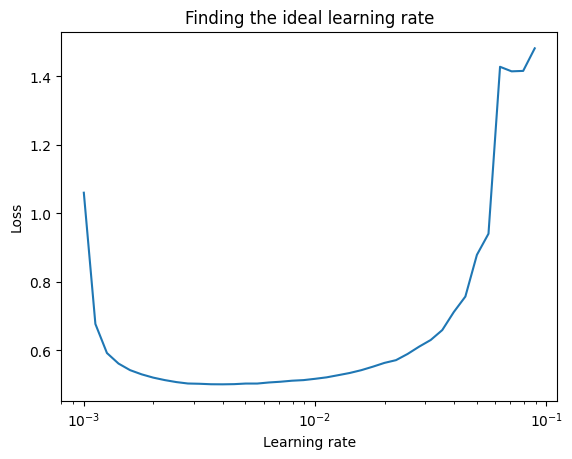

In [121]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");
     

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
Assess some of its predictions (through visualizations).
Improve its accuracy (by training it for longer or changing the architecture).
Save and export it for use in an application.
Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [142]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_m4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_m4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_m4.fit(train_data,
                       train_labels,
                       epochs=100,
                       validation_data=(test_data, test_labels),verbose=0)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [146]:
y_probs=model_m4.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [147]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(7, 'Sneaker')

In [148]:
y_preds=y_probs.argmax(axis=1)

In [149]:
y_preds[:100]

array([7, 4, 1, 1, 6, 1, 2, 2, 5, 7, 2, 5, 8, 3, 4, 1, 6, 2, 8, 0, 0, 7,
       7, 9, 1, 2, 2, 3, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 9,
       2, 5, 6, 1, 4, 2, 6, 2, 5, 4, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       3, 3, 7, 8, 7, 0, 6, 6, 4, 3, 1, 6, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 2, 7, 1, 8, 0, 1, 2, 2])

In [150]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)
     

array([[778,   4,  20,  68,  10,   0, 113,   0,   7,   0],
       [  9, 931,   2,  48,   2,   0,   8,   0,   0,   0],
       [ 35,   1, 440,  17, 160,   0, 344,   0,   3,   0],
       [ 36,  13,  12, 837,  47,   9,  45,   0,   1,   0],
       [  3,   0, 243,  49, 631,   2,  67,   0,   5,   0],
       [  0,   0,   0,  12,   3, 877,   0,  60,   8,  40],
       [166,   0, 342,  53, 110,   0, 323,   0,   6,   0],
       [  0,   0,   0,   0,   0,  41,   0, 935,   4,  20],
       [  4,   0,  15,   2,  44,  13,   6,  11, 905,   0],
       [  1,   0,   0,   4,   0,  42,   0,  69,   0, 884]])

In [151]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
     

    
  
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
     

     

In [152]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


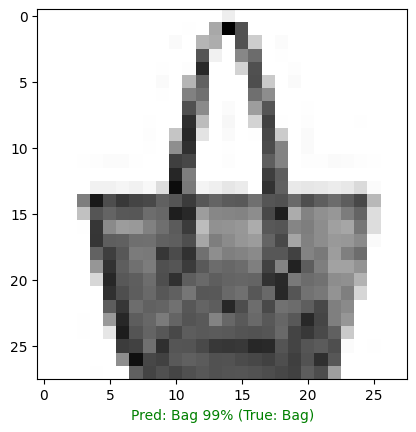

In [157]:
plot_random_image(model_m4,images=test_data,true_labels=test_labels,classes=class_names)

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.